In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import sys

if ".." not in sys.path:
    sys.path.append("..")

from utils.plotting import plot_series
from utils.const import VARIABLE_COLORS

In [3]:
norte2 = pd.read_csv(
    "../non_atypical_datasets/NORTE2_2021_2023.csv", parse_dates=["date"]
)
noroeste2 = pd.read_csv(
    "../non_atypical_datasets/NOROESTE2_2021_2023.csv", parse_dates=["date"]
)
sureste3 = pd.read_csv(
    "../non_atypical_datasets/SURESTE3_2021_2023.csv", parse_dates=["date"]
)

In [4]:
viento_norte = norte2[["WDR", "WSR", "PM2.5"]]
viento_sur = sureste3[["date", "WDR", "WSR", "PM2.5"]]
viento_noro = noroeste2[["WDR", "WSR", "PM2.5"]]
viento_noro = viento_noro.rename(
    columns={
        "WDR": "WDR_noroeste2",
        "WSR": "WSR_noroeste2",
        "PM2.5": "PM2.5_noroeste2",
    }
)
viento_sur = viento_sur.rename(
    columns={
        "WDR": "WDR_sureste3",
        "WSR": "WSR_sureste3",
        "PM2.5": "PM2.5_sureste3",
    },
)
viento_norte = viento_norte.rename(
    columns={
        "WDR": "WDR_norte2",
        "WSR": "WSR_norte2",
        "PM2.5": "PM2.5_norte2",
    }
)

In [5]:
compara = pd.concat([viento_sur, viento_noro, viento_norte], axis=1, join="inner")
compara

,date,WDR_sureste3,WSR_sureste3,PM2.5_sureste3,WDR_noroeste2,WSR_noroeste2,PM2.5_noroeste2,WDR_norte2,WSR_norte2,PM2.5_norte2
0,2021-03-01 01:00:00,46.0,3.0,7.0,11.0,1.40,16.08,93.0,5.3,2.0
1,2021-03-01 02:00:00,350.0,1.2,7.0,9.0,1.40,21.31,43.0,5.7,5.5
2,2021-03-01 03:00:00,316.0,0.7,7.0,10.0,1.40,16.03,322.0,2.6,5.5
3,2021-03-01 04:00:00,289.0,1.1,7.0,11.0,1.65,16.33,297.0,1.6,5.5
4,2021-03-01 05:00:00,285.0,0.8,7.0,11.0,1.90,15.97,151.0,1.6,5.5
...,...,...,...,...,...,...,...,...,...,...
21594,2023-08-17 19:00:00,54.0,12.7,15.0,87.0,15.90,7.41,83.0,8.5,18.0
21595,2023-08-17 20:00:00,50.0,8.9,9.0,87.0,15.80,7.41,68.0,10.4,8.0
21596,2023-08-17 21:00:00,56.0,10.5,3.0,85.0,14.50,7.41,70.0,8.4,5.0
21597,2023-08-17 22:00:00,86.0,16.9,2.0,87.0,12.60,7.41,91.0,9.8,7.0


In [14]:
meses = [
    "Enero",
    "Febrero",
    "Marzo",
    "Abril",
    "Mayo",
    "Junio",
    "Julio",
    "Agosto",
    "Septiembre",
    "Octubre",
    "Noviembre",
    "Diciembre",
]
num_meses = [3, 7, 12]
compara["month"] = compara["date"].dt.month
compara["year"] = compara["date"].dt.year
compara["day"] = compara["date"].dt.day


mensualidad = compara.groupby(["year", "month", "day"]).mean().reset_index()
# Aplicar correlación por numero de mes, usando la lista num_meses
for i, mes in enumerate(meses, start=1):
    print("Correlación para el mes de", mes, ":")
    print(
        mensualidad.loc[mensualidad["month"] == i][
            [
                "WDR_sureste3",
                "WDR_noroeste2",
                "WDR_norte2",
                "WSR_sureste3",
                "WSR_norte2",
                "WSR_noroeste2",
                "PM2.5_sureste3",
                "PM2.5_noroeste2",
                "PM2.5_norte2",
            ]
        ].corr()
    )
    print("\n")

Correlación para el mes de Enero :
                 WDR_sureste3  WDR_noroeste2  WDR_norte2  WSR_sureste3  \
WDR_sureste3         1.000000       0.376272    0.271804      0.563075   
WDR_noroeste2        0.376272       1.000000    0.792438     -0.072119   
WDR_norte2           0.271804       0.792438    1.000000     -0.238492   
WSR_sureste3         0.563075      -0.072119   -0.238492      1.000000   
WSR_norte2           0.483571      -0.177852   -0.301498      0.811175   
WSR_noroeste2        0.125066      -0.020636   -0.116537      0.413097   
PM2.5_sureste3       0.216123       0.633045    0.720576     -0.190684   
PM2.5_noroeste2      0.009300       0.274006    0.430844     -0.391072   
PM2.5_norte2         0.156731       0.552780    0.660601     -0.278568   

                 WSR_norte2  WSR_noroeste2  PM2.5_sureste3  PM2.5_noroeste2  \
WDR_sureste3       0.483571       0.125066        0.216123         0.009300   
WDR_noroeste2     -0.177852      -0.020636        0.633045        

In [12]:
compara = compara.drop(columns=["month", "year", "day"])
meses_importantes = ["Noviembre", "Diciembre", "Enero"]
interest_vars = ["date", "PM2.5_sureste3"]

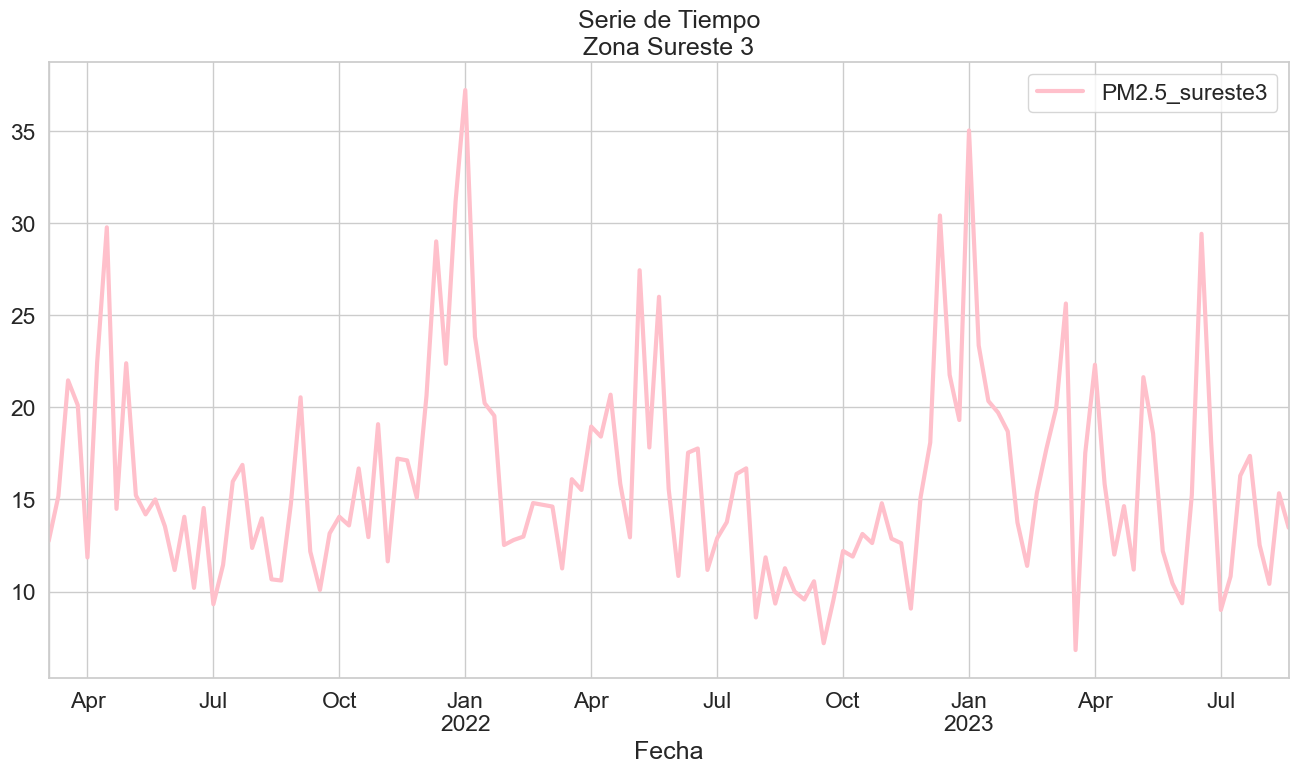

In [13]:
plot_series(
    compara,
    title="Serie de Tiempo\nZona Sureste 3",
    interest_vars=interest_vars,
    freq="W",
)

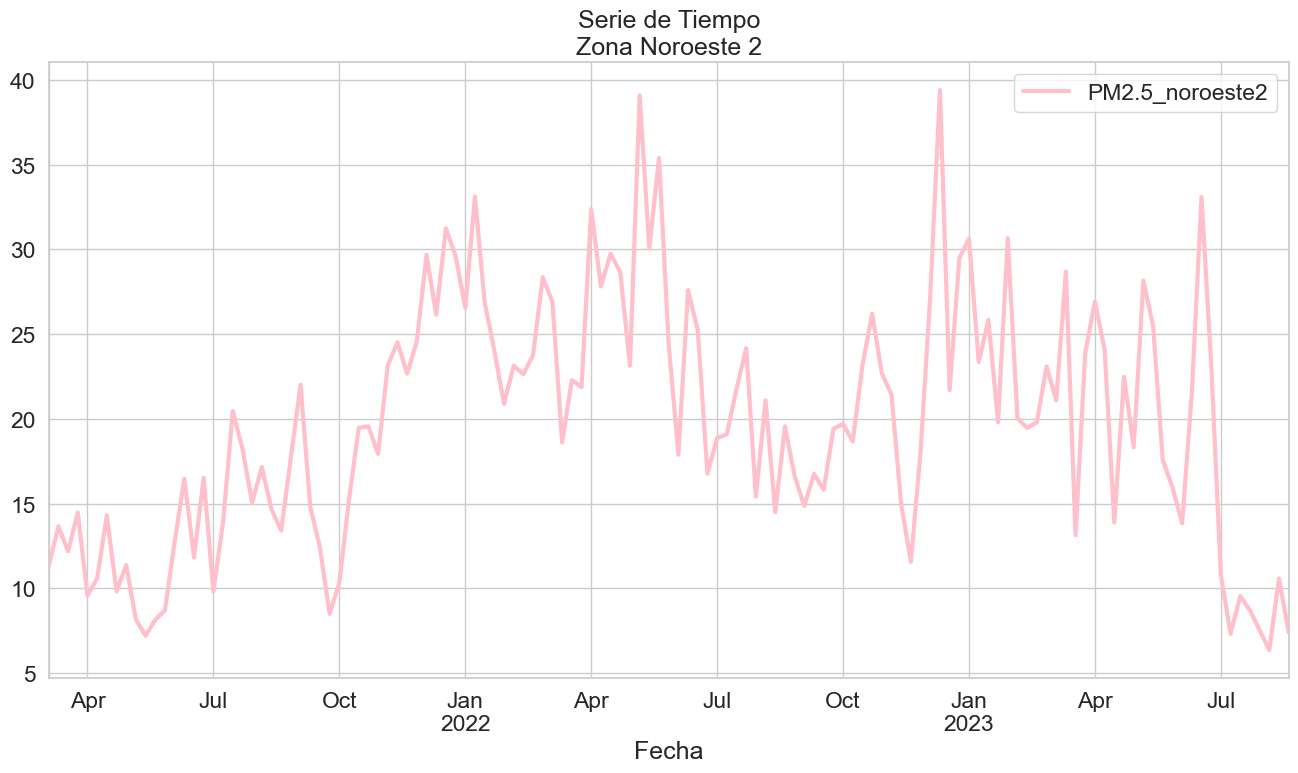

In [163]:
plot_series(
    compara,
    title="Serie de Tiempo\nZona Noroeste 2",
    interest_vars=["date", "PM2.5_noroeste2"],
    freq="W",
)

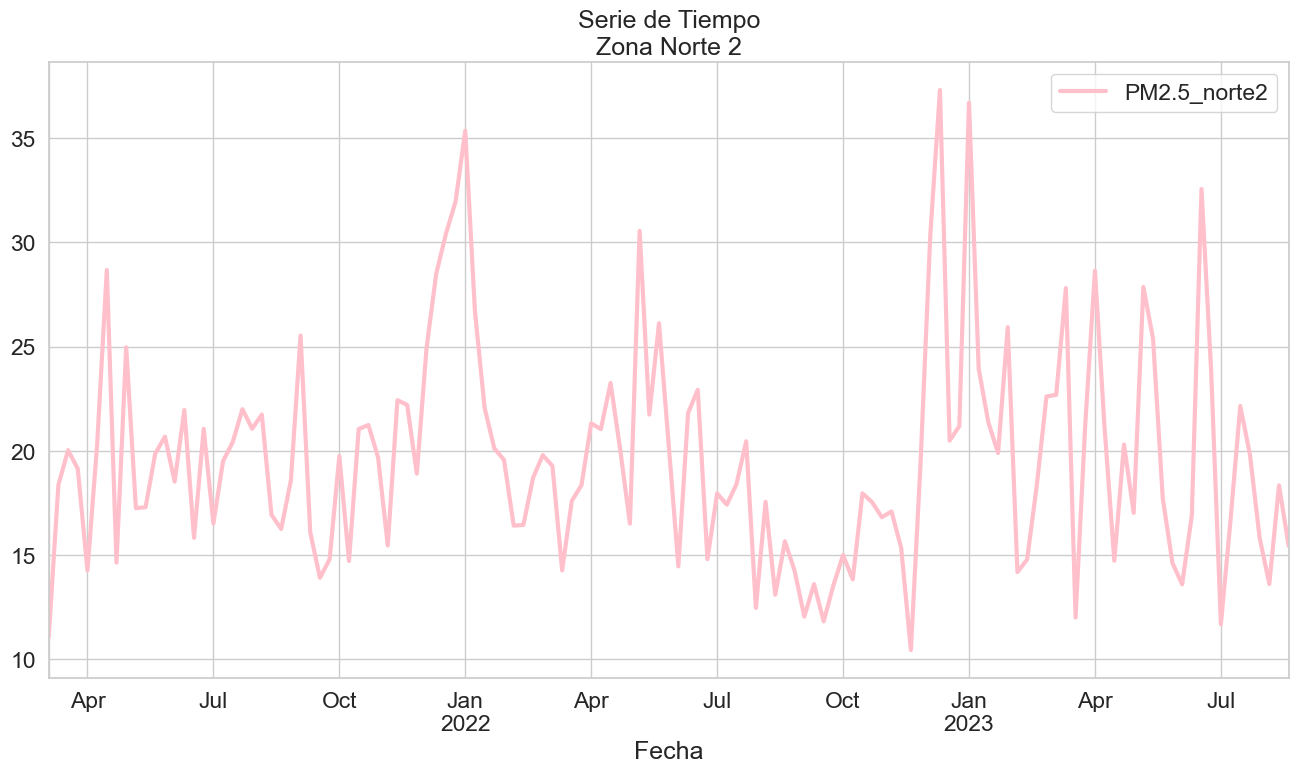

In [164]:
plot_series(
    compara,
    title="Serie de Tiempo\nZona Norte 2",
    interest_vars=["date", "PM2.5_norte2"],
    freq="W",
)